In [2087]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2088]:
X, y = make_blobs(500, centers=2, cluster_std=1.4)
y[y == 0] = -1

In [2089]:
n_samples, n_features = X.shape
alphas = np.random.normal(size=n_samples)
b = 0

In [2090]:
LR = 1
EPOCHS = 100
C = 0.9

In [2091]:
def linear_kernel(x1: ndarray, x2: ndarray) -> ndarray:
    return np.dot(x1, x2.T)

In [2092]:
def decision_func(features: ndarray = X) -> ndarray:
    res = np.array([])
    for i in features:
        res = np.append(res, np.sum(y*alphas*linear_kernel(features, i)) - b)
    return res

In [2093]:
def step_SMO(i1: int, i2: int) -> bool:
    if i1 == i2:
        return False
    global b

    L = np.maximum(0., alphas[i2]-alphas[i1]) if y[i2] != y[i1] else np.maximum(0., alphas[i2]+alphas[i1]-C)
    H = np.minimum(C, C+alphas[i2]-alphas[i1]) if y[i2] != y[i1] else np.minimum(C, alphas[i2]+alphas[i1])
    if L == H:
        return False

    eta = 2 * (-linear_kernel(X[i1], X[i2]) + linear_kernel(X[i1], X[i1]) + linear_kernel(X[i2], X[i2]))
    if eta <= 0:
        return False

    error1 = np.sum(y*alphas*linear_kernel(X, X[i1])) - b
    error2 = np.sum(y*alphas*linear_kernel(X, X[i2])) - b
    a_2_new = alphas[i2] + LR*y[i2]*(error1-error2)/eta

    if a_2_new > H:
        a_2_new = H
    elif a_2_new < L:
        a_2_new = L
    
    a_1_new = alphas[i1] + LR*y[i1]*y[i2]*(alphas[i2]-a_2_new)
    b1 = b - error1 - y[i1]*(a_1_new-alphas[i1])*linear_kernel(X[i1], X[i1]) - y[i2] * (a_2_new - alphas[i2]) * np.inner(X[i1], X[i2])
    b2 = b - error2 - y[i1]*(a_1_new-alphas[i1])*linear_kernel(X[i1], X[i2]) - y[i2]*(a_2_new - alphas[i2])*np.inner(X[i2], X[i2])
    
    if 1 < a_1_new < C:
        b = b1
    elif 1 < a_2_new < C:
        b = b2

    alphas[i1] = a_1_new
    alphas[i2] = a_2_new
    return True
        

0.0


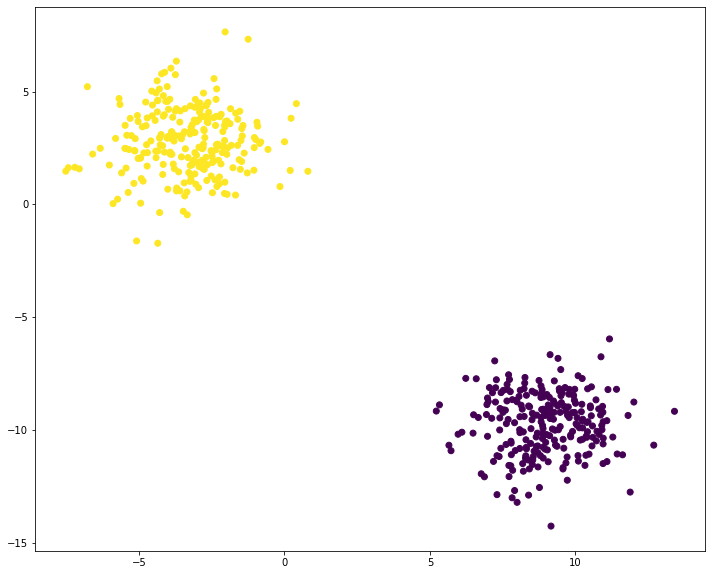

1.0


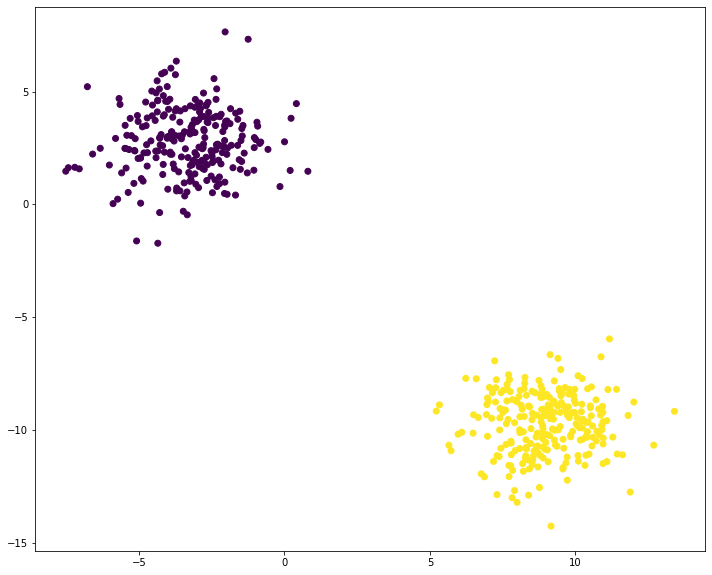

In [2094]:
print(np.count_nonzero(np.sign(decision_func()) == y) / len(y))

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
ax.scatter(X[:, 0], X[:, 1], c=np.sign(decision_func()))
plt.show()

for _ in range(10000):
    step_SMO(np.random.randint(0, len(alphas)), np.random.randint(0, len(alphas)))

print(np.count_nonzero(np.sign(decision_func()) == y) / len(y))

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
ax.scatter(X[:, 0], X[:, 1], c=np.sign(decision_func()))
plt.show()

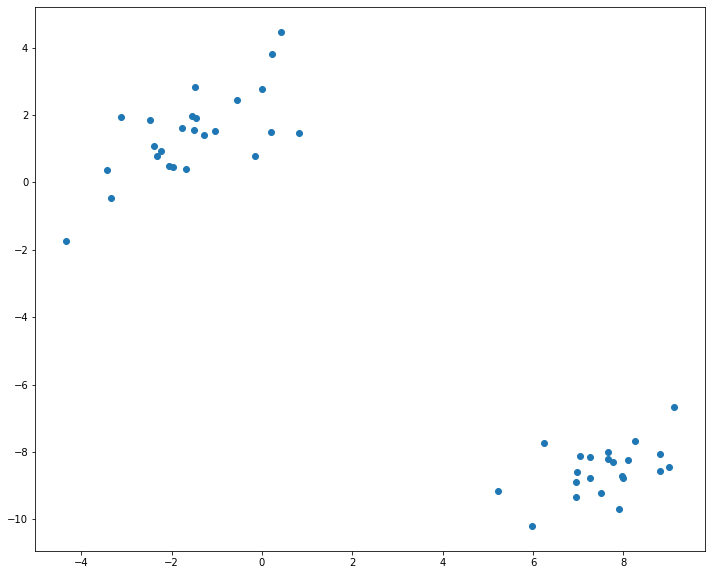

In [2095]:
sv = X[alphas > 10e-5]

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
ax.scatter(sv[:, 0], sv[:, 1])
plt.show()